# Flight Cancellation and Delays

In this code, I am going to perform EDA (exploratory data analysis) on a dataset of Flights cancellation and delays between 2019-2023.

1)- Importing important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Printing the dataset

In [137]:
flights = pd.read_csv('/home/himanshu_27/Desktop/Machine Learning/EDA/DataSets/flights_sample_3m.csv')
flights.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,0.0,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,0.0,109.0,89.0,58.0,399.0,NaN,NaN,NaN,NaN,NaN
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,0.0,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,0.0,227.0,219.0,200.0,1379.0,NaN,NaN,NaN,NaN,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN


In [53]:
# Shape of the Data
flights.shape

(3000000, 32)

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [87]:
airline = flights['AIRLINE'].value_counts()
Top10 = airline.head(10)
Top10

AIRLINE
Southwest Airlines Co.    576470
Delta Air Lines Inc.      395239
American Airlines Inc.    383106
SkyWest Airlines Inc.     343737
United Air Lines Inc.     254504
Republic Airline          143107
Envoy Air                 121256
JetBlue Airways           112844
Endeavor Air Inc.         112463
PSA Airlines Inc.         107050
Name: count, dtype: int64

Visualising the Data

Top 10 Flights and their Count

Text(0.5, 1.0, 'Flight names and their Count')

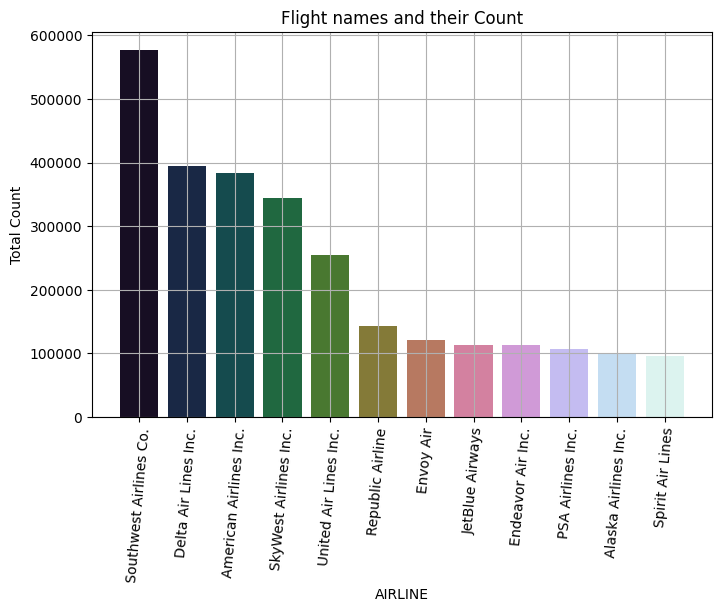

In [81]:
plt.figure(figsize = (8, 5))
plt.xlabel('AIRLINE')
plt.ylabel('Total Count')

First10 = airline.head(12)# for First 10 counts.

colors = sns.color_palette('cubehelix', 12)

plt.bar(First10.index, First10.values, color = colors)
plt.xticks(rotation = 85)
plt.grid()

plt.title("Flight names and their Count")

Flight name and their Count from Last

Text(0.5, 1.0, 'Flight names and their Count')

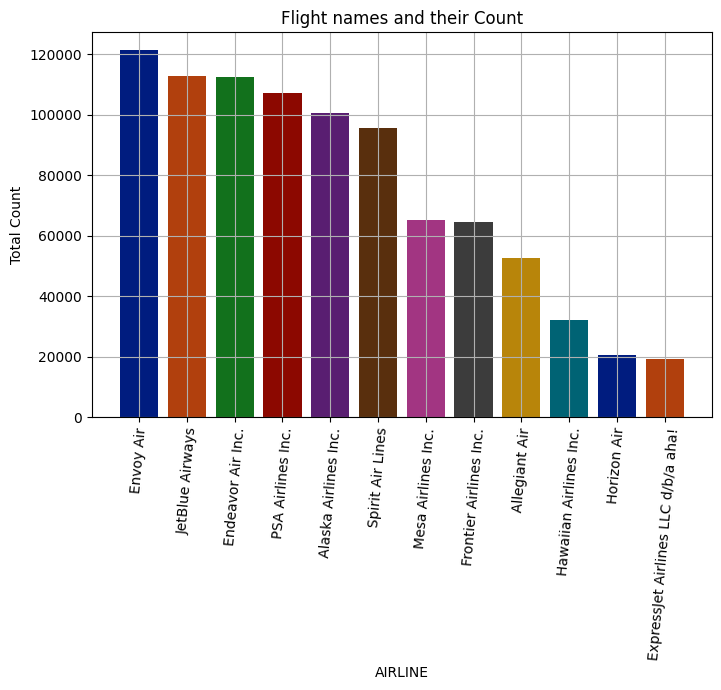

In [83]:
plt.figure(figsize = (8, 5))
plt.xlabel('AIRLINE')
plt.ylabel('Total Count')

Last10 = airline.tail(12) # top 10 from last.

color = sns.color_palette('dark')

plt.bar(Last10.index, Last10.values, color = color)
plt.xticks(rotation = 85)
plt.grid()
plt.title("Flight names and their Count")

Getting all the Airline names along with Mean of their Air Time and Distance.

In [163]:
# Fetching all the unique Airline names
flight_names = list((flights['AIRLINE'].unique()))
flight_names

['United Air Lines Inc.',
 'Delta Air Lines Inc.',
 'Spirit Air Lines',
 'Southwest Airlines Co.',
 'American Airlines Inc.',
 'Republic Airline',
 'Alaska Airlines Inc.',
 'JetBlue Airways',
 'PSA Airlines Inc.',
 'Allegiant Air',
 'ExpressJet Airlines LLC d/b/a aha!',
 'SkyWest Airlines Inc.',
 'Endeavor Air Inc.',
 'Envoy Air',
 'Frontier Airlines Inc.',
 'Mesa Airlines Inc.',
 'Horizon Air',
 'Hawaiian Airlines Inc.']

fetching Airline with mean of their flight's AIR_TIME and DISTANCE.

In [247]:
# now finding the mean of all the airline's airtime and distance.
mean_airtime = flights.groupby('AIRLINE')['AIR_TIME'].mean()
mean_distance = flights.groupby('AIRLINE')['DISTANCE'].mean()

df_mean_airtime = pd.DataFrame(mean_airtime)
df_mean_distance = pd.DataFrame(mean_distance)

merged_data = pd.merge(df_mean_airtime, df_mean_distance, on = 'AIRLINE', how = 'inner')
merged_data


,AIR_TIME,DISTANCE
AIRLINE,,
Alaska Airlines Inc.,175.297516,1343.332348
Allegiant Air,118.805576,880.157837
American Airlines Inc.,133.827622,989.416519
Delta Air Lines Inc.,124.944488,929.125327
Endeavor Air Inc.,66.750237,419.203400
Envoy Air,75.377523,483.140372
ExpressJet Airlines LLC d/b/a aha!,73.346833,453.796719
Frontier Airlines Inc.,134.002424,994.352620
Hawaiian Airlines Inc.,110.552243,846.813757


Lets show it using visualisation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Alaska Airlines Inc.'),
  Text(1, 0, 'Allegiant Air'),
  Text(2, 0, 'American Airlines Inc.'),
  Text(3, 0, 'Delta Air Lines Inc.'),
  Text(4, 0, 'Endeavor Air Inc.'),
  Text(5, 0, 'Envoy Air'),
  Text(6, 0, 'ExpressJet Airlines LLC d/b/a aha!'),
  Text(7, 0, 'Frontier Airlines Inc.'),
  Text(8, 0, 'Hawaiian Airlines Inc.'),
  Text(9, 0, 'Horizon Air'),
  Text(10, 0, 'JetBlue Airways'),
  Text(11, 0, 'Mesa Airlines Inc.'),
  Text(12, 0, 'PSA Airlines Inc.'),
  Text(13, 0, 'Republic Airline'),
  Text(14, 0, 'SkyWest Airlines Inc.'),
  Text(15, 0, 'Southwest Airlines Co.'),
  Text(16, 0, 'Spirit Air Lines'),
  Text(17, 0, 'United Air Lines Inc.')])

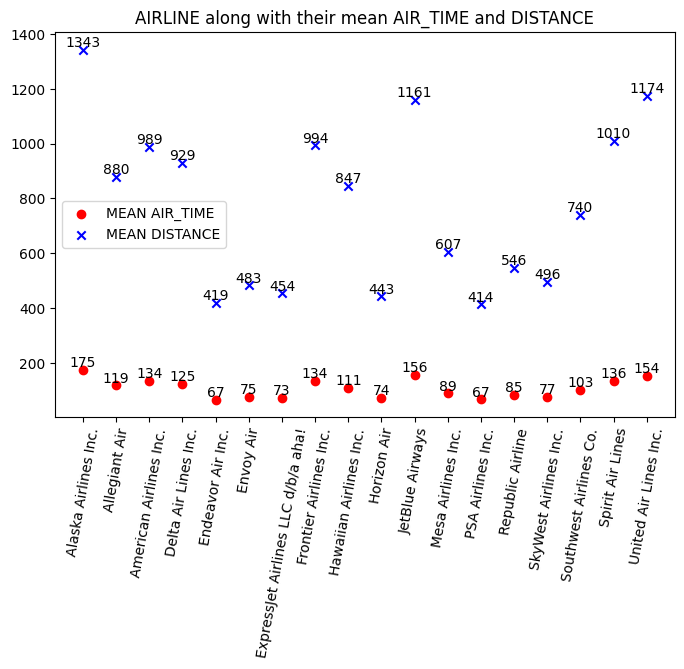

In [315]:
plt.figure(figsize = (8, 5)) # for figure size
new = merged_data.reset_index()

plt.scatter(new['AIRLINE'], new['AIR_TIME'], label = 'MEAN AIR_TIME', marker = 'o', color = 'r')
plt.scatter(new['AIRLINE'], new['DISTANCE'], label = 'MEAN DISTANCE', marker = 'x', color = 'blue')

for i, value in enumerate(new['AIR_TIME']):
    plt.text(new['AIRLINE'][i], value, f'{value:.0f}', ha='center', va='bottom')

for i, value in enumerate(new['DISTANCE']):
    plt.text(new['AIRLINE'][i], value, f'{value:.0f}', ha='center', va='bottom')

plt.title('AIRLINE along with their mean AIR_TIME and DISTANCE')
plt.legend()
plt.xticks(rotation = 80)

If i assume that the AIR_TIME is given in minutes and DISTANCE in km, then we can also calculate their Speed.

In [320]:
new['SPEED'] = new['DISTANCE']  / (new['AIR_TIME'] / 60 ) # speed in kmh^-1
new[['AIRLINE', 'AIR_TIME', 'DISTANCE', 'SPEED']]

,AIRLINE,AIR_TIME,DISTANCE,SPEED
0,Alaska Airlines Inc.,175.297516,1343.332348,459.789408
1,Allegiant Air,118.805576,880.157837,444.503297
2,American Airlines Inc.,133.827622,989.416519,443.592963
3,Delta Air Lines Inc.,124.944488,929.125327,446.178303
4,Endeavor Air Inc.,66.750237,419.203400,376.810709
5,Envoy Air,75.377523,483.140372,384.576477
6,ExpressJet Airlines LLC d/b/a aha!,73.346833,453.796719,371.219888
7,Frontier Airlines Inc.,134.002424,994.352620,445.224463
8,Hawaiian Airlines Inc.,110.552243,846.813757,459.591086
9,Horizon Air,73.678954,443.181497,360.902106


lets plot the speed graph

/tmp/ipykernel_23662/2761337186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = new, x = 'AIRLINE', y = 'SPEED', palette = 'bright')


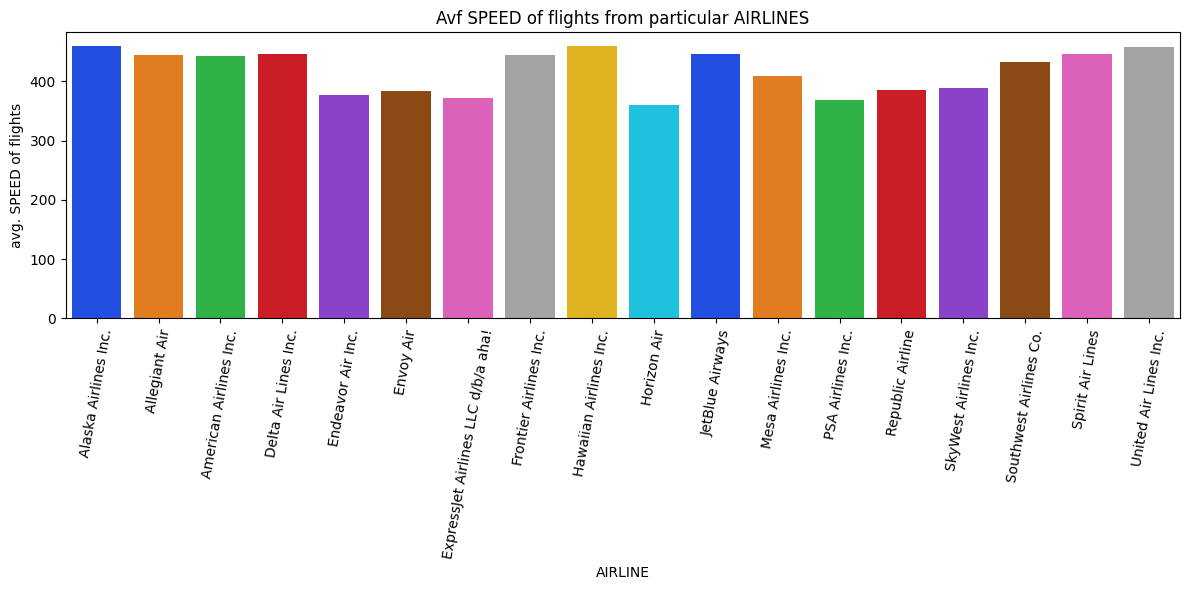

In [329]:
plt.figure(figsize = (12, 6))
sns.barplot(data = new, x = 'AIRLINE', y = 'SPEED', palette = 'bright')

plt.title('Avf SPEED of flights from particular AIRLINES')
plt.ylabel('avg. SPEED of flights')
plt.xticks(rotation = 80)

plt.tight_layout()

Top Destinations and Outgoing Flight counts

In [332]:
dest = flights['DEST'].value_counts()
top10 = dest.head(10)

outgoing = flights['ORIGIN'].value_counts()
Top_outgoing = outgoing.head(10)

Plotting the Graph

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ATL'),
  Text(1, 0, 'DFW'),
  Text(2, 0, 'ORD'),
  Text(3, 0, 'DEN'),
  Text(4, 0, 'CLT'),
  Text(5, 0, 'LAX'),
  Text(6, 0, 'PHX'),
  Text(7, 0, 'LAS'),
  Text(8, 0, 'SEA'),
  Text(9, 0, 'MCO')])

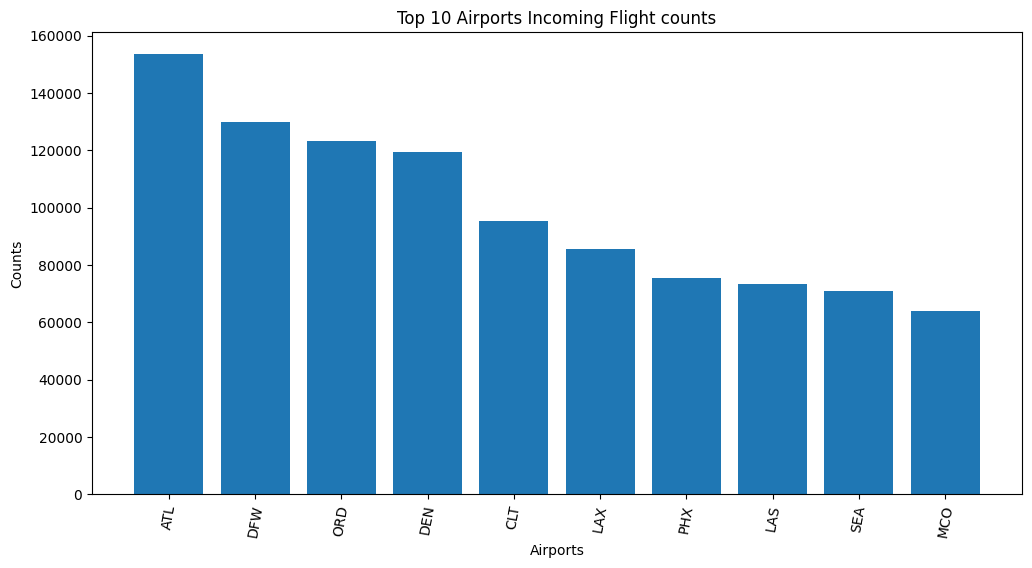

In [338]:
plt.figure(figsize = (12, 6))

plt.bar(top10.index, top10.values)

plt.title('Top 10 Airports by Incoming Flight counts')

plt.ylabel('Counts')
plt.xlabel('Airports')
plt.xticks(rotation = 80)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ATL'),
  Text(1, 0, 'DFW'),
  Text(2, 0, 'ORD'),
  Text(3, 0, 'DEN'),
  Text(4, 0, 'CLT'),
  Text(5, 0, 'LAX'),
  Text(6, 0, 'PHX'),
  Text(7, 0, 'LAS'),
  Text(8, 0, 'SEA'),
  Text(9, 0, 'MCO')])

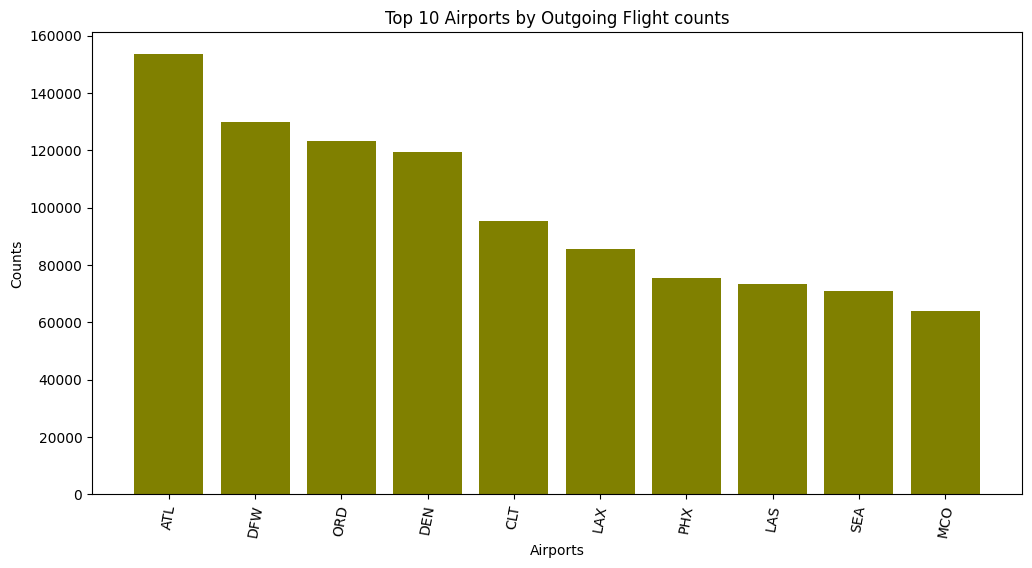

In [345]:
plt.figure(figsize = (12, 6))

plt.bar(top10.index, top10.values, color = 'Olive')

plt.title('Top 10 Airports by Outgoing Flight counts')

plt.ylabel('Counts')
plt.xlabel('Airports')
plt.xticks(rotation = 80)